In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_vg = pd.read_csv("https://raw.githubusercontent.com/thedanieljk/Data301FinalProject/master/df_vg_final.csv")
df_vg = df_vg.iloc[:539] #only 539 have recorded sales (over 10,000)
df_vg


,Rank,Name,Year,Genre,Publisher,Developer,Critic_Score,User_Score,Global_Sales
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,Rockstar North,9.0,9.0,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,Treyarch,NaN,NaN,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,Sledgehammer Games,NaN,NaN,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,Rockstar Games,NaN,NaN,5.77
4,5,Minecraft,2014.0,Misc,Microsoft Studios,Mojang,NaN,NaN,5.43
...,...,...,...,...,...,...,...,...,...
534,535,V-Rally 4,2018.0,Racing,Bigben Interactive,Kylotonn,NaN,NaN,0.01
535,536,Jagged Alliance: Rage!,2018.0,Strategy,THQ Nordic,Cliffhanger Productions,NaN,NaN,0.01
536,537,Ziggurat,2015.0,Shooter,Milkstone Studios,Milkstone Studios,NaN,NaN,0.01
537,538,ATV Renegades,2017.0,Racing,Nighthawk Interactive,Nighthawk Interactive,NaN,NaN,0.01


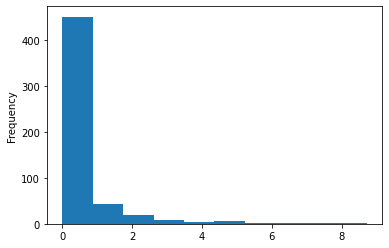

In [3]:
df_vg["Global_Sales"].plot.hist()

Looking at a histogram of the data, it is clear that very few games make it above 1 million sales. 

In [4]:
print("Global Sales Median is %f" % df_vg["Global_Sales"].median())
print("Global Sales Median is %f" % df_vg["Global_Sales"].mean())

Global Sales Median is 0.130000
Global Sales Median is 0.548256


Median global sales is at 0.13 million (130,000).
Mean global sales is at 0.548 million (548,000) because of the outliers with millions of copies sold skewing the data to the right.

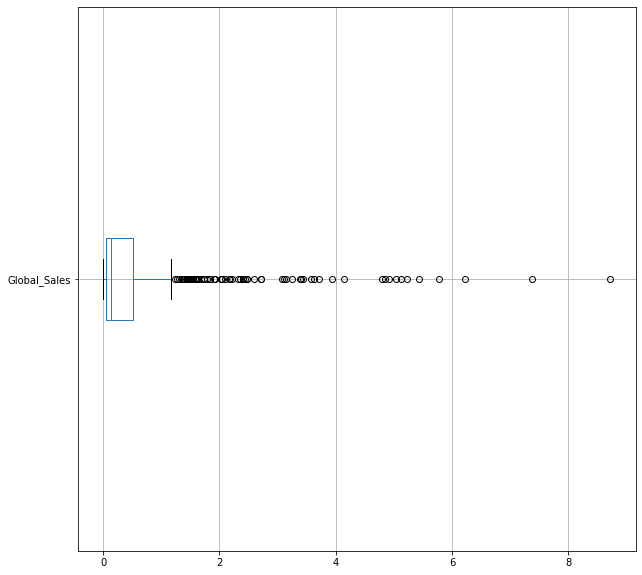

In [5]:
df_vg[["Global_Sales"]].boxplot(vert=False,figsize=(10,10))

Looking at a boxplot, we can see that most observations have very low sales, so games that sold high amounts (over ~100,000 copies) are outliers.

In [0]:
df_top20 = df_vg.iloc[:20].iloc[::-1]
#get top20, reverse so ascending order

<Figure size 1440x1440 with 0 Axes>

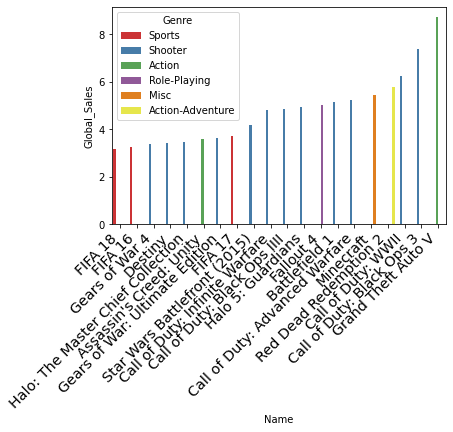

<Figure size 1440x1440 with 0 Axes>

In [7]:
top20Chart = sns.barplot(x='Name', 
                         y='Global_Sales', 
                         hue='Genre', 
                         data=df_top20,
                         palette="Set1"
                         )
top20Chart.set_xticklabels(top20Chart.get_xticklabels(), 
                           rotation=45,
                           horizontalalignment="right",                        
                           fontweight='light',
                           fontsize='x-large')

plt.figure(figsize=(20,20))

In [8]:
df_top20["Genre"].value_counts()

Shooter             12
Sports               3
Action               2
Role-Playing         1
Misc                 1
Action-Adventure     1
Name: Genre, dtype: int64

If you take a look at the top 20 games, the majority of them (12/20) are shooter games.

In [9]:
df_vg["Genre"].value_counts()

Action              106
Shooter              67
Sports               66
Racing               60
Action-Adventure     43
Role-Playing         37
Adventure            36
Simulation           27
Platform             21
Fighting             20
Strategy             16
Misc                 16
Music                13
Puzzle                6
MMO                   3
Party                 1
Visual Novel          1
Name: Genre, dtype: int64

Action is by far the most popular genre. Shooter, Sports, Racing are close together for 2nd/3rd/4th. Shooter had only 67 games but represented 12 of the top 20 highest selling games!

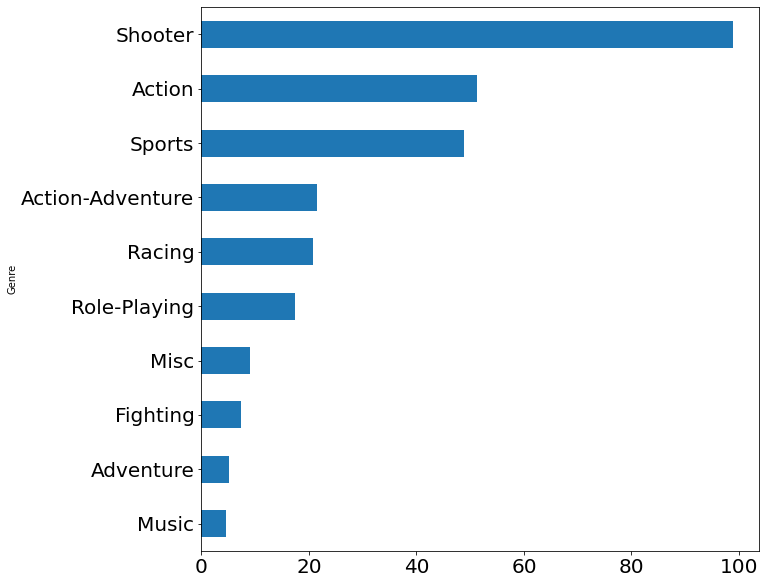

In [10]:
ax = (df_vg.groupby("Genre")["Global_Sales"].
 sum(axis=1).
 sort_values(ascending=False).
 iloc[:10].
 iloc[::-1].
 plot.barh(figsize=(10,10),fontsize="20"))



Shooters are by far the highest selling genre with nearly 100 million copies sold on the Xbox One. Action and Sports are a close 2nd and 3rd at roughly 50 million.

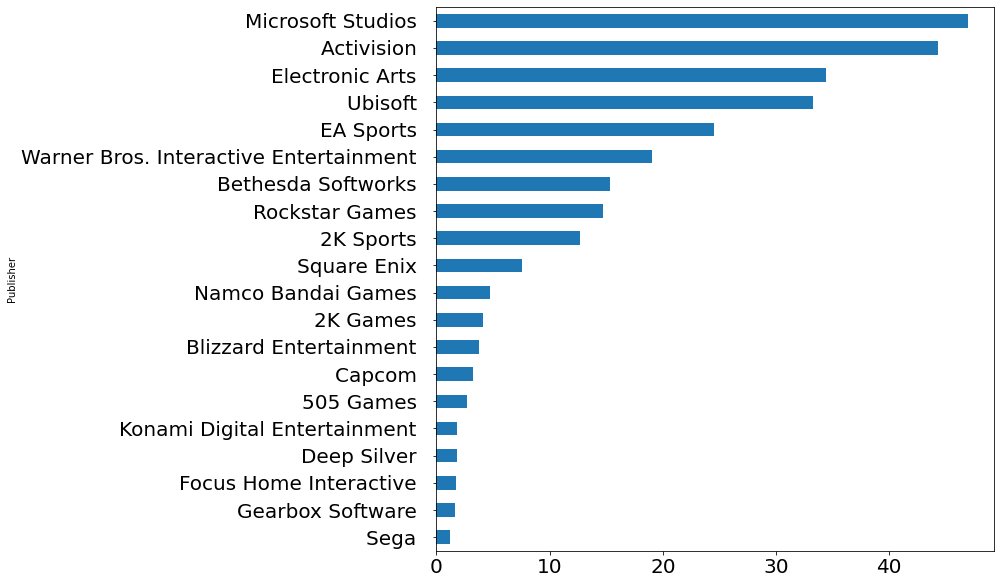

In [11]:
(df_vg.groupby("Publisher")["Global_Sales"].
 sum(axis=1).
 sort_values(ascending=False).
 iloc[:20].
 iloc[::-1].
 plot.barh(figsize=(10,10),fontsize=20))

Most sales are dominated by a select few publishing companies, such as Microsoft, Activision (all of the Call of Duty games), and EA (who also has a separate publishing company for their sports games like FIFA and Madden).

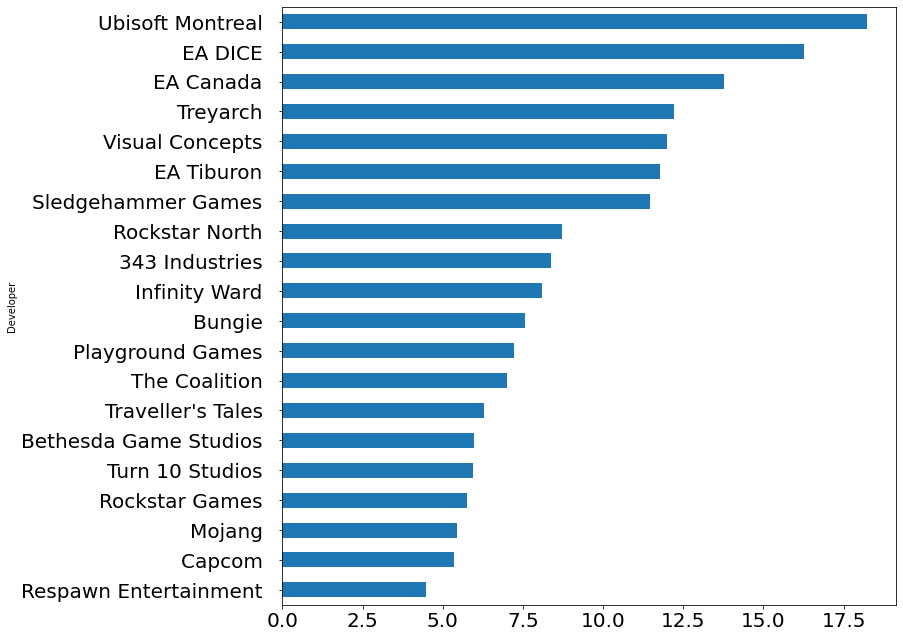

In [12]:
(df_vg.groupby("Developer")["Global_Sales"].
 sum(axis=1).
 sort_values(ascending=False).
 iloc[:20].
 iloc[::-1].
 plot.barh(
     figsize=(11,11),fontsize=20))

Developer company sales were more spread out as even large development studios cannot churn out games that quickly (tends to still take a year or two).

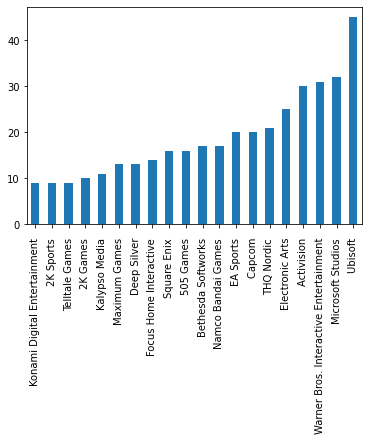

In [13]:
df_vg["Publisher"].value_counts().iloc[:20].iloc[::-1].plot.bar()

In [14]:
df_vg["Publisher"].value_counts().iloc[:20]

Ubisoft                                     45
Microsoft Studios                           32
Warner Bros. Interactive Entertainment      31
Activision                                  30
Electronic Arts                             25
THQ Nordic                                  21
Capcom                                      20
EA Sports                                   20
Namco Bandai Games                          17
Bethesda Softworks                          17
505 Games                                   16
Square Enix                                 16
Focus Home Interactive                      14
Deep Silver                                 13
Maximum Games                               13
Kalypso Media                               11
2K Games                                    10
Telltale Games                               9
2K Sports                                    9
Konami Digital Entertainment                 9
Name: Publisher, dtype: int64

Ubisoft has published the most games despite not being the highest selling publishing company (45 games published, 4th highest sales). There is a large spread in number of games published with even the lower companies in the top 20 having published less than 10 games.

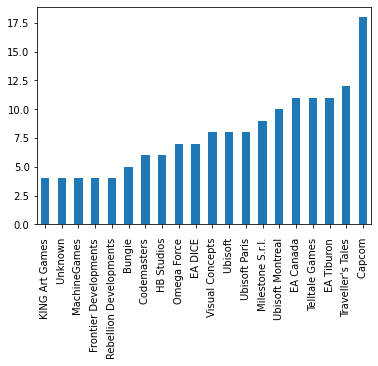

In [16]:
df_vg["Developer"].value_counts().iloc[:20].iloc[::-1].plot.bar()

In [18]:
df_vg["Developer"].value_counts().iloc[:20]

Capcom                      18
Traveller's Tales           12
EA Tiburon                  11
Telltale Games              11
EA Canada                   11
Ubisoft Montreal            10
Milestone S.r.l.             9
Ubisoft Paris                8
Ubisoft                      8
Visual Concepts              8
EA DICE                      7
Omega Force                  7
HB Studios                   6
Codemasters                  6
Bungie                       5
Rebellion Developments       4
Frontier Developments        4
MachineGames                 4
Unknown                      4
KING Art Games               4
Name: Developer, dtype: int64

Even the most popular developing companies tend to not be able to make that many games. Lower end of the top 20 is at only 4 games in this dataset which represents ~6.5 years of games.